### Task 4

### Sales Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Data types

In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### No. of unique values

In [8]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

#### Null values

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Unique values

In [15]:
for i in df:
    print(f'{i}:{df[i].unique()}')

TV:[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206.8 215.4 284.3  50. 

##### outliers

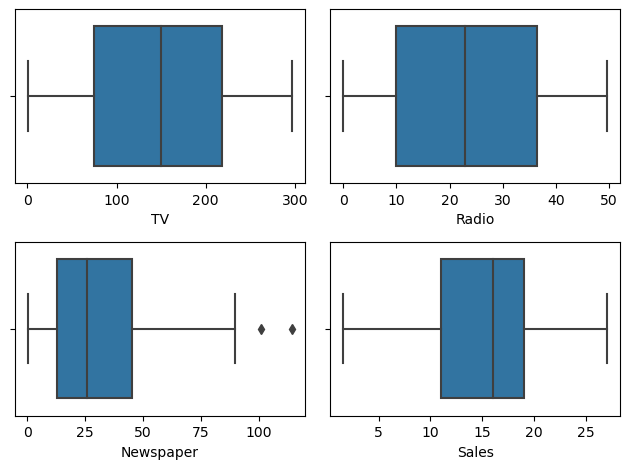

In [16]:
t=1
for i in df:
    plt.subplot(2,2,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

* There is outliers in Newspapers.
* But those outliers are not considerable.

#### 5 point sumamry

In [18]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Univariate Analysis

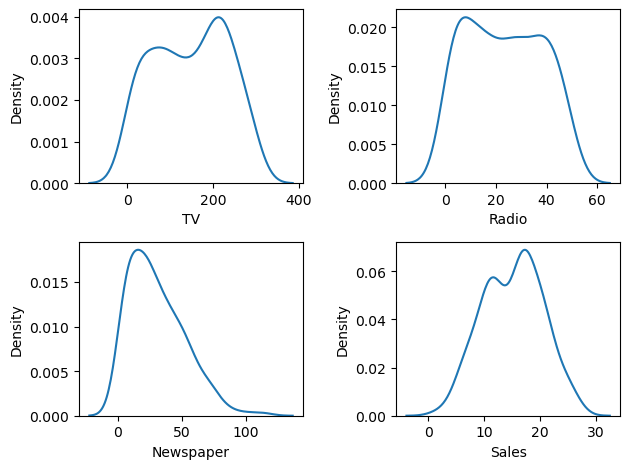

In [20]:
t=1
for i in df:
    plt.subplot(2,2,t)
    sns.kdeplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

* All the columns are skewed.

#### Bivariate Analysis

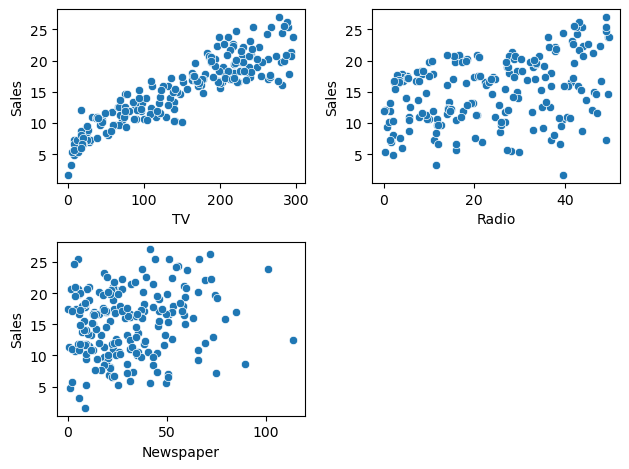

In [21]:
t=1
for i in df:
    if i!= 'Sales':
        plt.subplot(2,2,t)
        sns.scatterplot(x=df[i], y=df['Sales'])
        t+=1
plt.tight_layout()
plt.show()

* There ia linear relation between sales and tv.
*  There ia linear relation between sales and Radio.
*  There ia no linear relation between sales and newspaper.

#### Multivariate Analysis

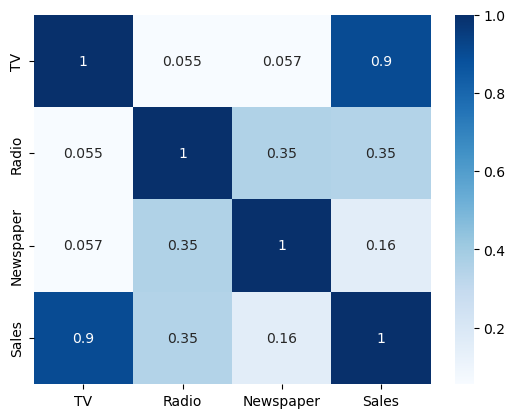

In [22]:
sns.heatmap(df.corr(),annot =True, cmap='Blues')
plt.show()

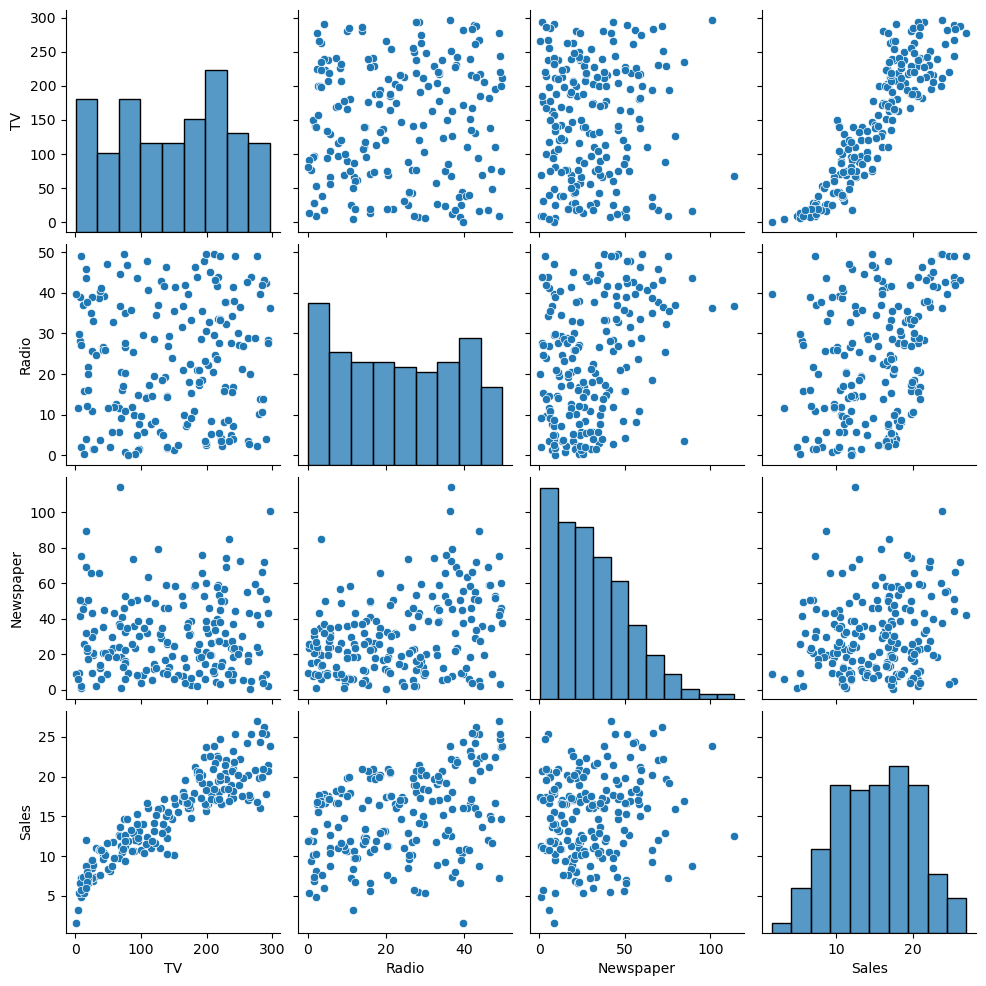

In [23]:
sns.pairplot(df)
plt.show()

* There is a relation between among the columns.(Multi collinearity present in the data).

#### Model Building

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop(columns=['Sales'])
y = df['Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size =0.30, random_state =2)

In [27]:
print('Xtrain:',xtrain.shape)
print('Ytrain:',ytrain.shape)
print('Xtest:',xtest.shape)
print('Ytest:',ytest.shape)

Xtrain: (140, 3)
Ytrain: (140,)
Xtest: (60, 3)
Ytest: (60,)


In [29]:
y.value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [30]:
ytrain.value_counts()

Sales
11.9    5
20.7    4
17.2    3
25.4    3
10.1    3
       ..
9.6     1
6.9     1
20.1    1
7.6     1
17.1    1
Name: count, Length: 98, dtype: int64

In [31]:
ytest.value_counts()

Sales
20.2    3
16.7    3
17.1    2
19.8    2
12.6    2
16.5    2
15.2    1
5.3     1
12.4    1
24.7    1
17.7    1
21.2    1
20.8    1
18.0    1
21.8    1
1.6     1
19.2    1
15.6    1
10.9    1
7.2     1
12.9    1
17.4    1
17.3    1
9.7     1
11.0    1
4.8     1
7.6     1
13.2    1
16.6    1
16.0    1
8.5     1
8.7     1
18.4    1
19.6    1
17.8    1
9.2     1
19.4    1
13.7    1
6.6     1
12.0    1
20.9    1
16.8    1
19.0    1
20.5    1
17.0    1
11.8    1
10.8    1
16.9    1
16.1    1
11.3    1
10.5    1
27.0    1
Name: count, dtype: int64

#### Build a base model

In [35]:
import statsmodels.api as sm

In [67]:
x = df.drop(columns=['Sales'])
y = df['Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size =0.30, random_state =2)

In [68]:
x_c = sm.add_constant(x)
model = sm.OLS(y, x_c).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.13e-99
Time:                        20:36:25   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R2 91% of the variance in Sales is explained by model
* From the summary there is moderate multicollinearity present in the data.
* In the summary the test probability is less than alpha(0.05) there are significant variables.
* there is one insignificant variable in the data.
* There is no auto correlation .

#### Assumption1: Dependent variable must be numeric

* Sales column is numeric.

####  Assumption2: Linear relation in data

In [70]:
error =model.resid

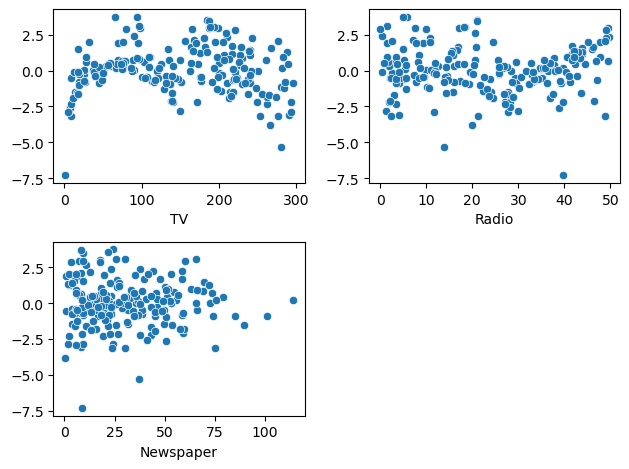

In [71]:
t=1
for i in x:
    plt.subplot(2,2,t)
    sns.scatterplot(x=x[i],y=error)
    t+=1
plt.tight_layout()
plt.show()

In [72]:
from statsmodels.stats.diagnostic import linear_rainbow

In [73]:
# test for linearity (rainbow test)

#  Ho: The data is linear
#  Ha: The data is not linear

p_value = linear_rainbow(model)[1]

if p_value<0.05:
    print('Reject Ho: Data is not linear')
else:
    print('Fail to reject Ho: Data is linear')

Fail to reject Ho: Data is linear


#### Assumption3: There should be no multicolinearity

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Features':x.columns,'VIF':vif}).sort_values(by='VIF',ascending=False)

,Features,VIF
1,Radio,3.285462
2,Newspaper,3.055245
0,TV,2.486772


#### Assumption 4: There should be no autocorrelation

Since durbin Watson Statistic is greater than 1.5 we say that there is a pos autocorrelation in data


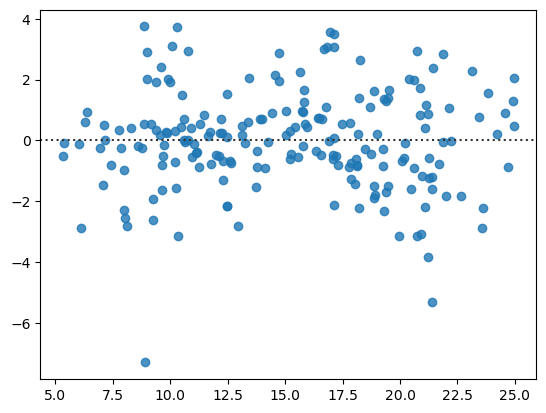

In [76]:
### Assumption5: The residual must be homoscedastic

sns.residplot(x=model.fittedvalues,y=model.resid)
plt.show()

#### Breuch Pagan test

* Ho: The residual are homoscedastic
* Ha: The residual are hetroscedastic

In [77]:
p_value = sm.stats.diagnostic.het_breuschpagan(model.resid,model.model.exog)[1]

if p_value<0.05:
    print('reject Ho: residual are hetroscedastic')
else:
    print('fail to reject Ho: residuals are homoscedastic')

fail to reject Ho: residuals are homoscedastic


#### Assumption6: Normality of residuals

In [78]:
import scipy.stats as stats

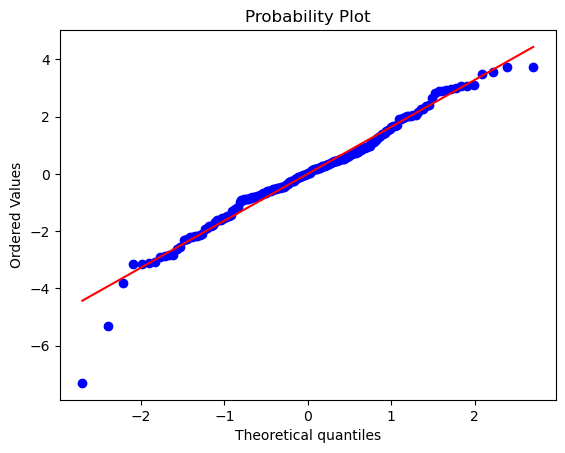

In [79]:
stats.probplot(model.resid,plot=plt)
plt.show()

#### Assumption 6: Residuals are normal

#### Shapiro Wilk test (N < 5000)

#### Ho: residuals is normal
#### Ha: residuals is not normal

In [80]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9758140444755554, pvalue=0.0015761888353154063)

In [81]:
if 0.27355<0.05:
    print('reject Ho: residual are Normal')
else:
    print('fail to reject Ho: residuals are not Normal')

fail to reject Ho: residuals are not Normal


In [93]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Linear Regression model

In [82]:
x = df.drop(columns=['Sales'])
y = df['Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size =0.30, random_state =2)

In [83]:
lr = LinearRegression()

In [86]:
m_lr =lr.fit(xtrain,ytrain)
m_lr

LinearRegression()

In [87]:
pred = m_lr.predict(xtest)

In [91]:
def model_validation(xtrain,ytrain,xtest,ytest,model):
    global m
    m = model
    m.fit(xtrain,ytrain)
    
    print('Training Scores')
    pred = m.predict(xtrain)
    print('R2:',r2_score(ytrain,pred))
    print('MSE:',mean_squared_error(ytrain,pred))
    print('RMSE:',mean_squared_error(ytrain,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytrain,pred))
    
    print('\nTest Scores')
    pred = m.predict(xtest)
    print('R2:',r2_score(ytest,pred))
    print('MSE:',mean_squared_error(ytest,pred))
    print('RMSE:',mean_squared_error(ytest,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytest,pred))

In [92]:
model_validation(xtrain,ytrain,xtest,ytest,LinearRegression())

Training Scores
R2: 0.9160841924726105
MSE: 2.4047091912068796
RMSE: 1.5507124785745678
MAPE: 0.0900070817399153

Test Scores
R2: 0.8669425938331328
MSE: 3.422684076942014
RMSE: 1.8500497498559367
MAPE: 0.16783619666484023


#### Lasso

In [95]:
model_validation(xtrain,ytrain,xtest,ytest,Lasso(alpha=0.005))

Training Scores
R2: 0.916084188056543
MSE: 2.4047093177546466
RMSE: 1.5507125193776718
MAPE: 0.09000939618820339

Test Scores
R2: 0.8669451830063872
MSE: 3.4226174746962177
RMSE: 1.8500317496454535
MAPE: 0.16783261585067152


#### Coefficients of Lasso

In [96]:
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,TV,0.054464
1,Radio,0.107824
2,Newspaper,0.001443


#### Ridge

In [97]:
model_validation(xtrain,ytrain,xtest,ytest,Ridge(alpha=0.5))

Training Scores
R2: 0.9160841924453161
MSE: 2.4047091919890335
RMSE: 1.5507124788267597
MAPE: 0.09000705772099038

Test Scores
R2: 0.8669426825067086
MSE: 3.4226817959593574
RMSE: 1.8500491333906128
MAPE: 0.16783577603741498


#### Coefficients of Ridge

In [98]:
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,TV,0.054464
1,Radio,0.107841
2,Newspaper,0.001450


#### Elastic net

In [99]:
model_validation(xtrain,ytrain,xtest,ytest,ElasticNet(alpha=0.01,l1_ratio=0.1))

Training Scores
R2: 0.9160841918566274
MSE: 2.404709208858624
RMSE: 1.550712484266063
MAPE: 0.09000748079704636

Test Scores
R2: 0.8669433359399158
MSE: 3.422664987459189
RMSE: 1.8500445906678002
MAPE: 0.1678344140863281


#### Coefficients of Elastic Net

In [100]:
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,TV,0.054464
1,Radio,0.107834
2,Newspaper,0.001449


#### Using Grid Search CV

In [101]:
model_validation(xtrain,ytrain,xtest,ytest,ElasticNet(alpha=0.001,l1_ratio=0.25))

Training Scores
R2: 0.9160841924547626
MSE: 2.4047091917183336
RMSE: 1.5507124787394773
MAPE: 0.09000719093005413

Test Scores
R2: 0.8669427423499405
MSE: 3.4226802565901235
RMSE: 1.8500487173558764
MAPE: 0.16783592639937842


#### Feature Selection

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [103]:
sfs = SequentialFeatureSelector(estimator=LinearRegression(),
                               k_features='best',
                               scoring='r2')

In [104]:
sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 3),
                          scoring='r2')

In [109]:
k = list(sfs.k_feature_names_)
k

['TV', 'Radio']

In [105]:
sfs.k_score_

0.9029617040588661

In [110]:
model_validation(xtrain[k],ytrain,xtest[k],ytest,LinearRegression())

Training Scores
R2: 0.916055611937563
MSE: 2.4055282010852728
RMSE: 1.5509765314424564
MAPE: 0.09025201256966789

Test Scores
R2: 0.8670708934175505
MSE: 3.419383780045244
RMSE: 1.8491575865905112
MAPE: 0.16797328625198732
